## Exercises

### Always make pretty plots (title, axis labeling, nice colors, legend, axis limits, grid (where appropriate), ...) !!!

Execute the first cell to get some data you can plot.

In [2]:
using Distributions

In [3]:
using CairoMakie

In [4]:
import ColorSchemes as co

In [5]:
#using Pkg
#Pkg.add("JSON")
#Pkg.add("CSV")
#Pkg.add("DataFrames")

In [6]:
using JSON

averagetemp_Station3 = Float64.(JSON.parsefile("Temperatur_Station3.json"))
averagetemp_Station44 = Float64.(JSON.parsefile("Temperatur_Station44.json"))
averagetemp_Station73 = Float64.(JSON.parsefile("Temperatur_Station73.json"))
rainfall_Station3 = Float64.(JSON.parsefile("Niederschlag_Station3.json"))
rainfall_Station44 = Float64.(JSON.parsefile("Niederschlag_Station44.json"))
rainfall_Station73 = Float64.(JSON.parsefile("Niederschlag_Station73.json"))



Histolist=rand(Normal(),(10000)).*15 .* 100
loglist=[exp(-i*0.1) for i in range(1,81)]
Months=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"];


### <p style='color: green'>easy</p>

1. Plot average temperatures per month at the three different stations against the months (Months) in three different plots. 
     - Once as scatter plot with legend, different colors, markers and grid.
     - Once as line plot with legend, different colors, markers and grid.

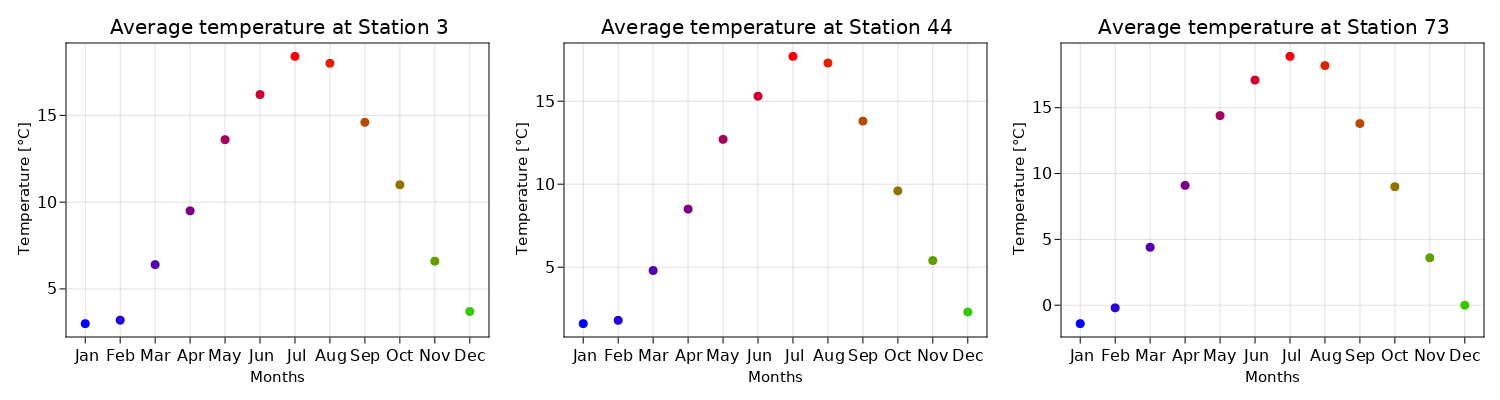

In [7]:
x_range = 1:length(Months)
y1 = averagetemp_Station3
y2 = averagetemp_Station44
y3 = averagetemp_Station73
color_vec = co.brg[1:8:96]

f12 = Figure(resolution = (1500,400))
ax12_1 = Axis(f12[1, 1], xticks = (x_range, Months), title = "Average temperature at Station 3", titlesize = 20, xlabel = "Months", ylabel = "Temperature [°C]", xlabelsize = 15, ylabelsize = 15)
ax12_2 = Axis(f12[1, 2], xticks = (x_range, Months), title = "Average temperature at Station 44", titlesize = 20, xlabel = "Months", ylabel = "Temperature [°C]", xlabelsize = 15, ylabelsize = 15)
ax12_3 = Axis(f12[1, 3], xticks = (x_range, Months), title = "Average temperature at Station 73", titlesize = 20, xlabel = "Months", ylabel = "Temperature [°C]", xlabelsize = 15, ylabelsize = 15)

scatty12_1 = scatter!(ax12_1, x_range, y1, color = color_vec)
scatty12_2 = scatter!(ax12_2, x_range, y2, color = color_vec)
scatty12_3 = scatter!(ax12_3, x_range, y3, color = color_vec)

f12

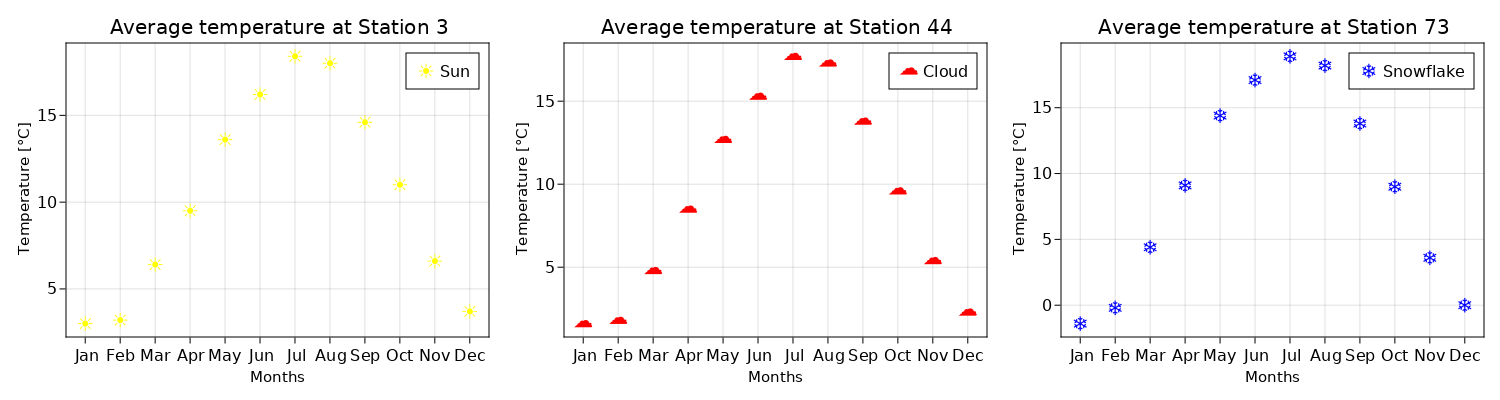

In [8]:
# change markers, colors add legend

scatty12_1.marker = '☀'
scatty12_1.color = :yellow
scatty12_1.markersize = 20
scatty12_1.label = "Sun"

scatty12_2.marker = '☁'
scatty12_2.color = :red
scatty12_2.markersize = 20
scatty12_2.label = "Cloud"

scatty12_3.marker = '❄'
scatty12_3.color = :blue
scatty12_3.markersize = 20
scatty12_3.label = "Snowflake"


axislegend(ax12_1)
axislegend(ax12_2)
axislegend(ax12_3)

f12


In [9]:
save("01 Exercise_scatter.png", f12)

CairoScreen{Cairo.CairoSurfaceBase{UInt32}} with surface:
Cairo.CairoSurfaceBase{UInt32}(Ptr{Nothing} @0x000000009ed5b740, 1500.0, 400.0)


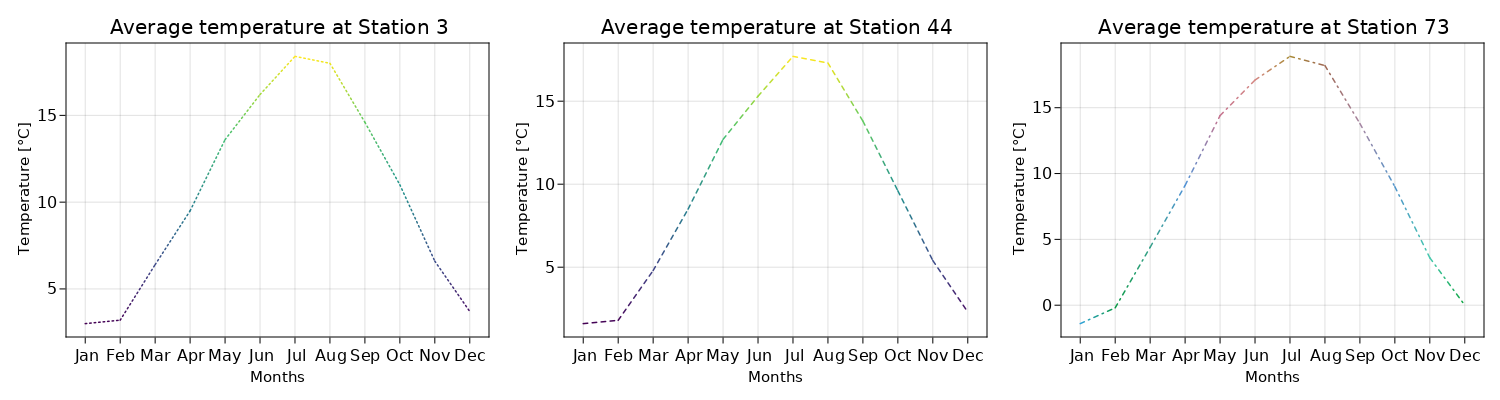

In [10]:
x_range = 1:length(Months)
y1 = averagetemp_Station3
y2 = averagetemp_Station44
y3 = averagetemp_Station73
#color_vec = co.brg[1:8:96]

f13 = Figure(resolution = (1500,400))
ax13_1 = Axis(f13[1, 1], xticks = (x_range, Months), title = "Average temperature at Station 3", titlesize = 20, xlabel = "Months", ylabel = "Temperature [°C]", xlabelsize = 15, ylabelsize = 15)
ax13_2 = Axis(f13[1, 2], xticks = (x_range, Months), title = "Average temperature at Station 44", titlesize = 20, xlabel = "Months", ylabel = "Temperature [°C]", xlabelsize = 15, ylabelsize = 15)
ax13_3 = Axis(f13[1, 3], xticks = (x_range, Months), title = "Average temperature at Station 73", titlesize = 20, xlabel = "Months", ylabel = "Temperature [°C]", xlabelsize = 15, ylabelsize = 15)

liney13_1 = lines!(ax13_1, x_range, y1, color = y1, linestyle = :dot)
liney13_2 = lines!(ax13_2, x_range, y2, color = y2, linestyle = :dash)
liney13_3 = lines!(ax13_3, x_range, y3, color = y3, linestyle = :dashdot, colormap = co.glasbey_hv_n256)


f13

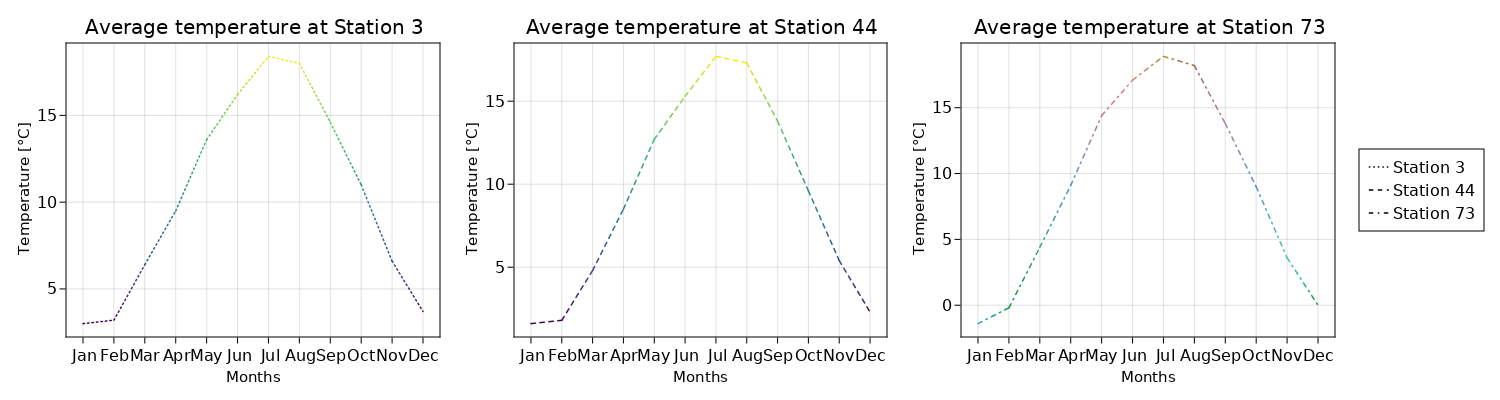

In [11]:
#add legend
leggy = Legend(f13[1, 4],
    [liney13_1, liney13_2, liney13_3],
    ["Station 3", "Station 44", "Station 73"])
f13

In [12]:
save("01 Exercise_line.png", f13)

CairoScreen{Cairo.CairoSurfaceBase{UInt32}} with surface:
Cairo.CairoSurfaceBase{UInt32}(Ptr{Nothing} @0x000000007da43560, 1500.0, 400.0)


2. Make a bar plot of the rainfall per month at station 3.

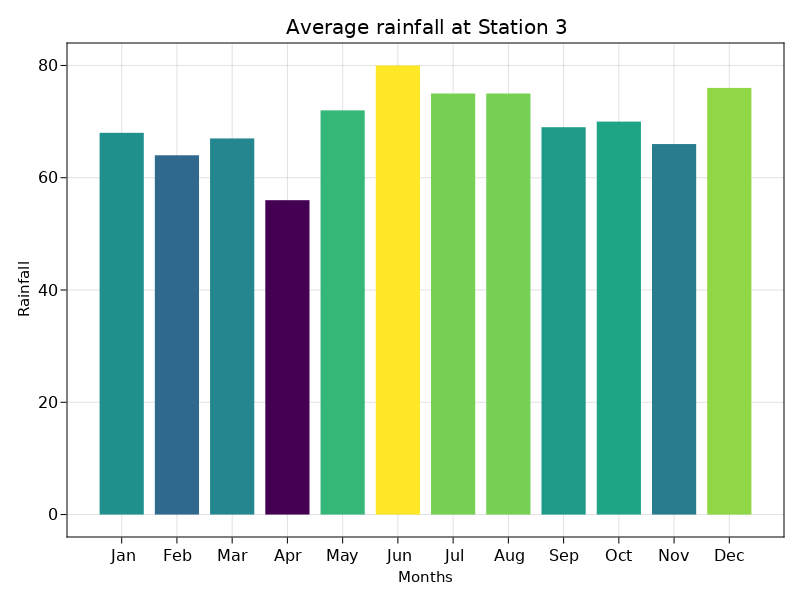

In [13]:
x_range = 1:length(Months)
y1 = rainfall_Station3

f14 = Figure()
ax14_1 = Axis(f14[1,1], xticks = (x_range, Months), title = "Average rainfall at Station 3", titlesize = 20, xlabel = "Months", ylabel = "Rainfall", xlabelsize = 15, ylabelsize = 15)
bar14_1 = barplot!(ax14_1, x_range, y1, color = y1)

f14

In [14]:
save("01 Exercise_bars.png", f14)

CairoScreen{Cairo.CairoSurfaceBase{UInt32}} with surface:
Cairo.CairoSurfaceBase{UInt32}(Ptr{Nothing} @0x000000007dcf2670, 800.0, 600.0)


3. Make a boxplot of the temperatures at each station.

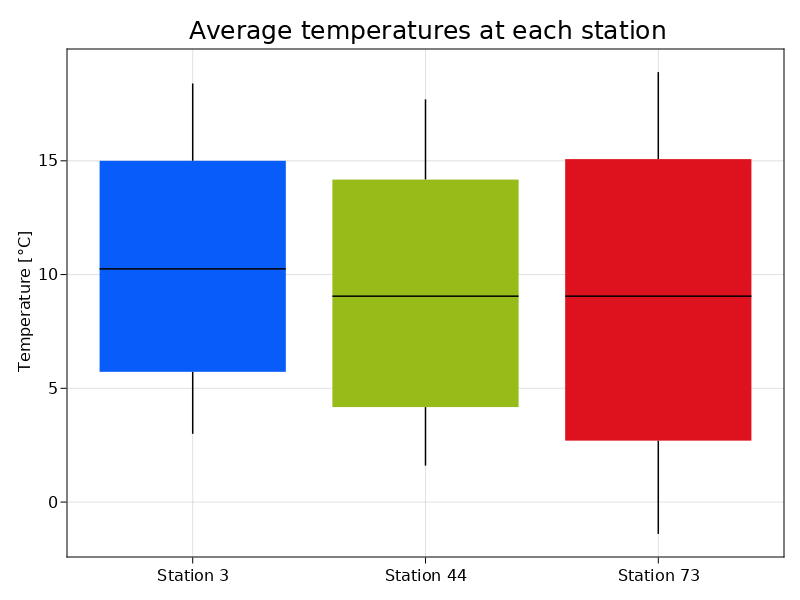

In [15]:
x_range = 1:length(Months)
y1 = averagetemp_Station3
y2 = averagetemp_Station44
y3 = averagetemp_Station73
x = [1 for i in 1:12]

xs = append!(x,x.*2,x.*3)
ys = append!(y1,y2,y3)

c1 = [co.diverging_rainbow_bgymr_45_85_c67_n256[1] for i in 1:12]
c2 = [co.diverging_rainbow_bgymr_45_85_c67_n256[85] for i in 1:12]
c3 = [co.diverging_rainbow_bgymr_45_85_c67_n256[250] for i in 1:12]
color_vec = append!(c1,c2,c3)

f1 = Figure()
ax1 = Axis(f1[1,1], xticks = (1:3, ["Station 3", "Station 44", "Station 73"]),
    title = "Average temperatures at each station", ylabel = "Temperature [°C]", titlesize = 25)
boxy = boxplot!(ax1, xs , ys, color = color_vec)
f1

In [16]:
save("01 Exercise_boxplot.png", f1)

CairoScreen{Cairo.CairoSurfaceBase{UInt32}} with surface:
Cairo.CairoSurfaceBase{UInt32}(Ptr{Nothing} @0x00000000a04dc550, 800.0, 600.0)


4. Make a single boxplot that includes the temperatures of all three stations. Add a dashed, horizontal line at 9.5°C.

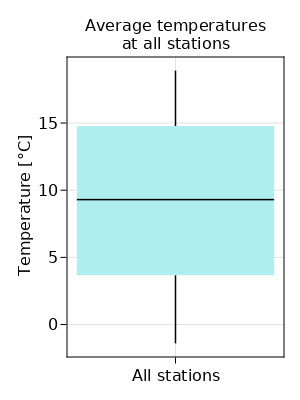

In [17]:
y1 = averagetemp_Station3
y2 = averagetemp_Station44
y3 = averagetemp_Station73
xs = [2 for i in 1:36]
ys = append!(y1,y2,y3)

f2 = Figure(resolution = (300,400))
ax2 = Axis(f2[1,1], xticks = (1:3, ["", "All stations", ""]),
    title = "Average temperatures \nat all stations", ylabel = "Temperature [°C]")
boxy2 = boxplot!(ax2, xs , ys, color = :paleturquoise)
f2

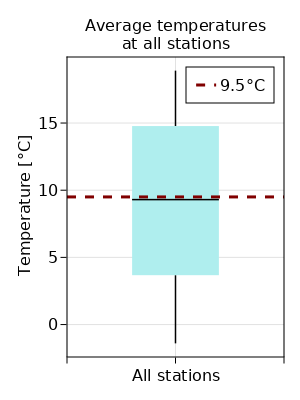

In [18]:
#add dashed line
liney = lines!(ax2, [1, 2, 3], [9.5,9.5,9.5], linestyle = :dash, color = :maroon, linewidth = 3, label = "9.5°C")
xlims!(ax2,1,3)
axislegend(ax2)
f2

In [19]:
save("01 Exercise_boxplot_2.png", f2)

CairoScreen{Cairo.CairoSurfaceBase{UInt32}} with surface:
Cairo.CairoSurfaceBase{UInt32}(Ptr{Nothing} @0x00000000a0b3cbb0, 300.0, 400.0)


5. Make a histogramm of `Histolist`, wich contains generated data of an IQ distribution, with `100` bins. Add a black vertical line at `100`

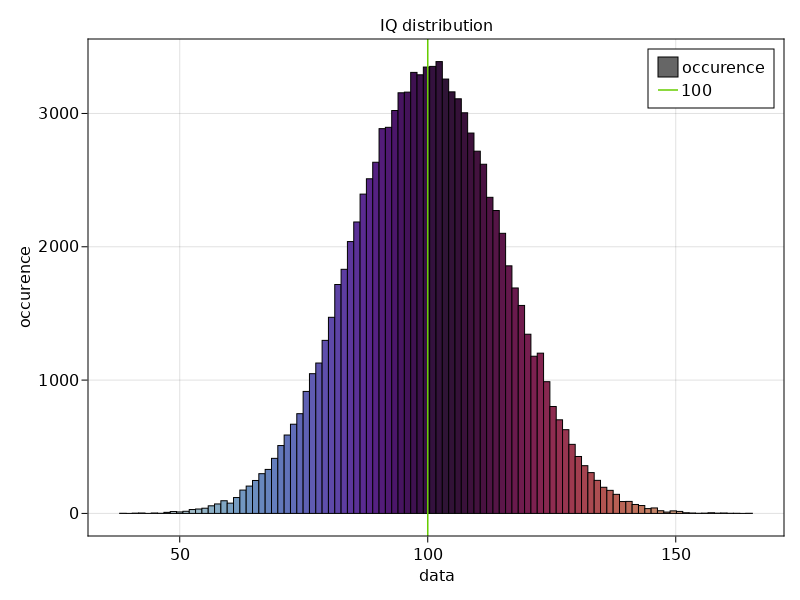

In [42]:
Histolist = rand(Normal(100,15),100000)


f3 = Figure()
ax3 = Axis(f3[1,1], title = "IQ distribution", xlabel = "data", ylabel = "occurence")
histo = hist!(ax3, Histolist; bins = 100, strokewidth = 1, strokecolor = :black, color =co.twilight[1:5:500], label = "occurence")

vlines!(ax3, [100], color = :chartreuse3, label = "100")
axislegend(ax3)
f3

6. Use the internet to find a keyword argument for `hist()` that plots the probability density instead of absolute occurences, i.e. the area under the all bars combined should be exactly `1`. Use this to make the same histogram with `20` bins.

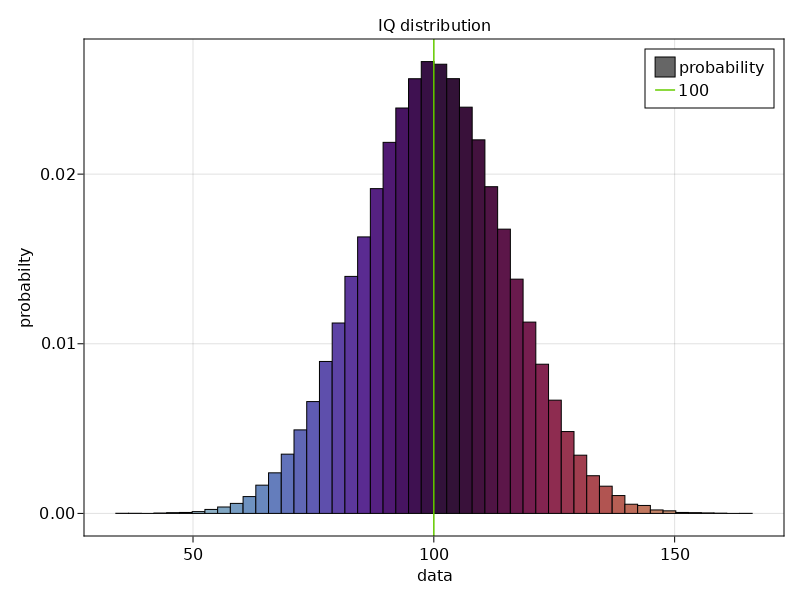

In [59]:
Histolist = rand(Normal(100,15),100000)

f7 = Figure()
ax7 = Axis(f7[1,1], title = "IQ distribution", xlabel = "data", ylabel = "probabilty")
histo7 = hist!(ax7, Histolist; bins = 50, strokewidth = 1, strokecolor = :black, normalization = :pdf, color =co.twilight[1:10:500], label = "probability")

vlines!(ax7, [100], color = :chartreuse3, label = "100")
axislegend(ax7)
display(f7)

### <p style='color: red'>hard</p>

7. Make a plot of `loglist`, which could resemble the decline of something over time (just come up with something for your labels), without and with a logarithmic y-axis (use the internet).

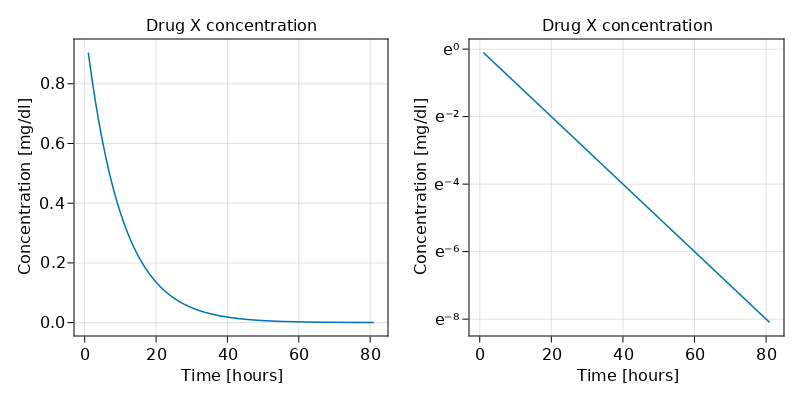

In [60]:
loglist = [exp(-i*0.1) for i in range(1,81)]

f6 = Figure(resolution = (800,400))
ax6_1 = Axis(f6[1,1], title = "Drug X concentration", xlabel = "Time [hours]", ylabel = "Concentration [mg/dl]")
ax6_2 = Axis(f6[1,2], title = "Drug X concentration", xlabel = "Time [hours]", ylabel = "Concentration [mg/dl]", yscale = log)

line1 = lines!(ax6_1, 1:81, loglist)
line2 = lines!(ax6_2, 1:81, loglist)


f6

In [61]:
save("01 Exercise_loglist.png", f6)

CairoScreen{Cairo.CairoSurfaceBase{UInt32}} with surface:
Cairo.CairoSurfaceBase{UInt32}(Ptr{Nothing} @0x00000000a173ba40, 800.0, 400.0)


8. Make a diagram in wich `averagetemp_Station73` are plotted as a line graph and `rainfall_Station73` is plotted as a bar graph. Try to get the axis for rainfall on the left and for temperature on the right side of the diagram.

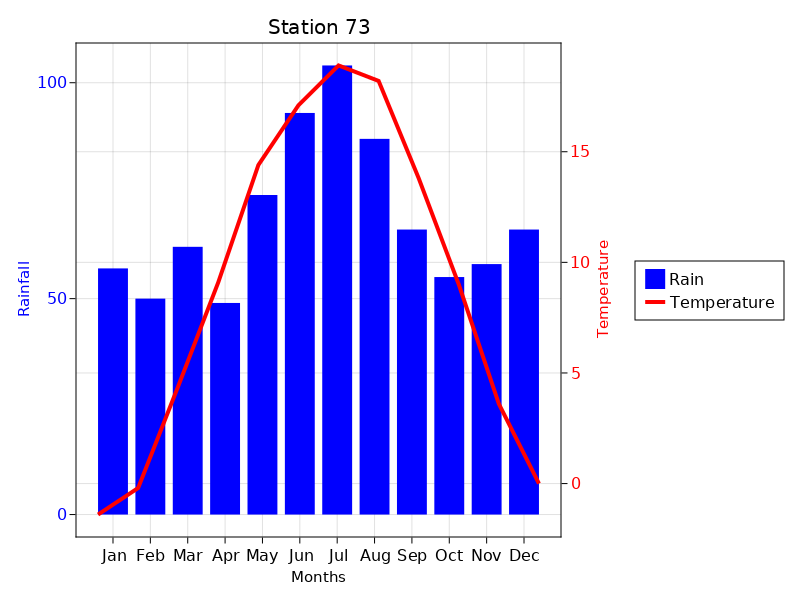

In [62]:
f5 = Figure()
y1 = rainfall_Station73
y2 = averagetemp_Station73

ax5_1 = Axis(f5[1, 1], xticks = (1:12, Months), yticklabelcolor = :blue, title = "Station 73", titlesize = 20, xlabel = "Months", ylabel = "Rainfall", xlabelsize = 15, ylabelsize = 15, ylabelcolor = :blue )
ax5_2 = Axis(f5[1, 1], yticklabelcolor = :red, yaxisposition = :right, ylabel = "Temperature", ylabelsize = 15, ylabelcolor = :red)
hidespines!(ax5_2)
hidexdecorations!(ax5_2)


bary1 = barplot!(ax5_1, 1:12, y1, color = :blue, label = "Rainfall")
liney2 = lines!(ax5_2, 1:12, y2, color = :red, label = "Temperature",linewidth = 4)

Legend(f5[1,2], [bary1, liney2], ["Rain", "Temperature"])

f5

In [63]:
save("01 Exercise_line+scatter.png", f5)

CairoScreen{Cairo.CairoSurfaceBase{UInt32}} with surface:
Cairo.CairoSurfaceBase{UInt32}(Ptr{Nothing} @0x00000000a173b590, 800.0, 600.0)


9. Make a plot with the rainfall of all three stations in one bar graph where the three different bars are shown for every month.

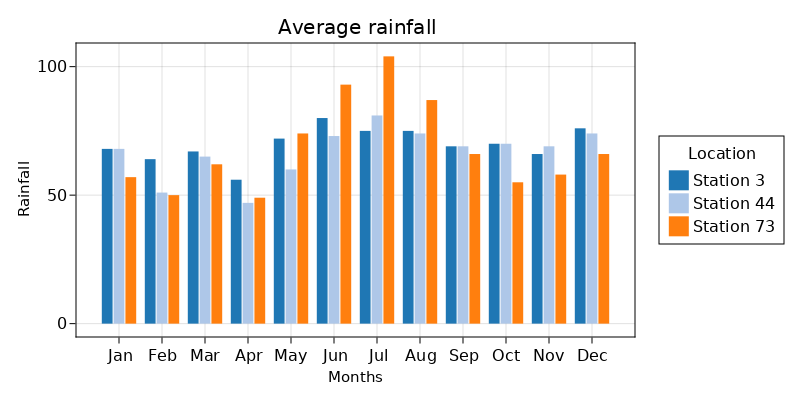

In [64]:
Months=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
y5 = rainfall_Station3
y6 = rainfall_Station44
y7 = rainfall_Station73
ys = Int64[]
xs= Int64[]
grp = Int64[]
for i in 1:12
    push!(ys, y5[i], y6[i], y7[i])
    push!(grp, 1, 2, 3)
    push!(xs, i, i, i)
end
colors = co.tab20

f4 = Figure(resolution = (800,400))
ax4 = Axis(f4[1, 1], xticks = (1:12, Months), title = "Average rainfall", titlesize = 20, xlabel = "Months", ylabel = "Rainfall", xlabelsize = 15, ylabelsize = 15)
xlims!(ax4, 0, 13)
barplot!(ax4, xs, ys, dodge = grp, color = colors[grp]) 

# Legend
labels = ["Station 3", "Station 44", "Station 73"]
elements = [PolyElement(polycolor = colors[i]) for i in 1:length(labels)]
title = "Location"

Legend(f4[1,2], elements, labels, title)

f4


In [65]:
save("01 Exercise_dodged bars.png", f4)

CairoScreen{Cairo.CairoSurfaceBase{UInt32}} with surface:
Cairo.CairoSurfaceBase{UInt32}(Ptr{Nothing} @0x00000000a173bbd0, 800.0, 400.0)


In [ ]:
using CSV, DataFrames
rainfall = DataFrame(CSV.File("Durchschnitt_Niederschlag.csv")) 
averagetemp = DataFrame(CSV.File("Durchschnitt_Temperatur.csv")) 